In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(0)
X = 10 * rng.rand(100, 1)-5
y = np.sinc(X).ravel()
y = y + .3* (0.5 - rng.rand(X.shape[0]) )

X_test=np.linspace(-5, 5, 200)
X_test=np.reshape(X_test,(200,1))
y_test = np.sinc(X_test).ravel()

plt.scatter(X, y, c='g', label='data', zorder=1,
            edgecolors=(0, 0, 0));

plt.plot(X_test, y_test, c='b');


In [3]:
model=SVR(kernel='rbf', gamma='auto', C=10.0, epsilon=0.1);
model.fit(X, y);
y_svr = model.predict(X)
train_mse=mean_squared_error(y, y_svr, multioutput='raw_values')
print('Training Set Error',train_mse)
print('number of coefficient',len(model.support_))

Training Set Error [0.00635648]
number of coefficient 33


In [4]:
y_test_svr = model.predict(X_test)
upper=y_test_svr+0.1;
lower=y_test_svr-0.1;
test_mse=mean_squared_error(y_test, y_test_svr, multioutput='raw_values')
print('Test Set Error',test_mse)

Test Set Error [0.00078847]


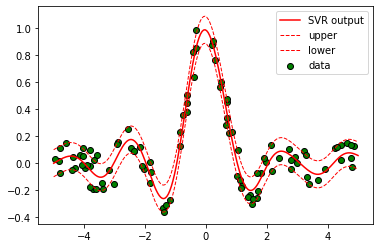

In [5]:
plt.scatter(X, y, c='g', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_test, y_test_svr, c='r',label='SVR output')
#plt.plot(X_test, y_test, c='b',label='Test set')
plt.plot(X_test, upper, c='r',linestyle='dashed',linewidth=1, label='upper')
plt.plot(X_test, lower, c='r',linestyle='dashed',linewidth=1, label='lower')
plt.legend()
plt.show()

In [34]:
print('dual coefficients \n',model.support_)

dual coefficients 
 [ 1  2  3  4 13 16 18 20 22 26 32 43 46 47 49 50 51 56 63 64 66 68 69 71
 73 75 77 79 80 84 92 93 94]


In [35]:
print('dual coefficients \n',model.dual_coef_)

dual coefficients 
 [[ 10.          -8.44267338  -0.68687331   7.29800671   0.81262183
   -3.80215754  -4.61516481  -0.33323739 -10.          10.
    5.3477864   -9.56172843   9.47112027 -10.          -3.32954258
   10.         -10.          -3.42092588 -10.         -10.
   10.          -7.49730169   5.19935055  10.          10.
   10.         -10.          10.           4.69735275 -10.
    9.62475459  -6.89197152  -3.86941657]]
